In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[x_grid.reshape(-1), y_grid.reshape(-1)])
    Z = Z.reshape(x_grid.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(12,6))
    plt.contourf(x_grid, y_grid, Z, cmap=plt.cm.Spectral)
    plt.ylabel('y')
    plt.xlabel('x')
#     plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)    
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
    plt.colorbar();

In [3]:
def load_dataset_1():
    np.random.seed(1)
    m = 300
    N = int(m/2)
    D = 2
    X = np.zeros((m,D))
    Y = np.zeros((m,1))
    a = 8
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    
    return X, Y

In [4]:
X, Y = load_dataset_1()

print("X[:2, :]: %s"%(X[:2, :]))
print("Y[:2, :]: %s"%(Y[:2, :]))
print("X.shape: %s"%(str(X.shape)))
print("Y.shape: %s"%(str(Y.shape)))

X[:2, :]: [[ 2.44026935  7.24541293]
 [ 0.36889817 -3.62515101]]
Y[:2, :]: [[0.]
 [0.]]
X.shape: (300, 2)
Y.shape: (300, 1)


In [6]:
Y[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

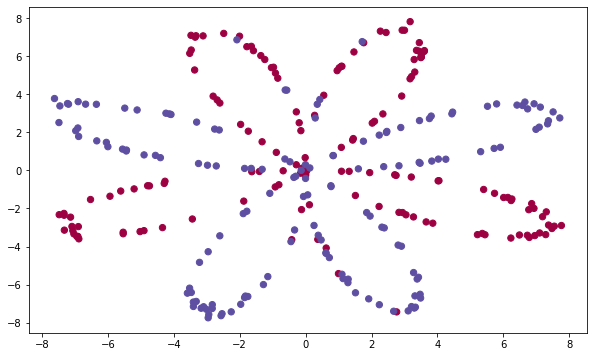

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=40, cmap=plt.cm.Spectral);

In [6]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, Y.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [7]:
X_ = X[0]
print(X.shape)
y_test = X[:1]
print(y_test.shape)
print(clf.predict(np.array([[-8,-8]])))
print(clf.predict(np.array([[8,8]])))

(300, 2)
(1, 2)
[1.]
[0.]


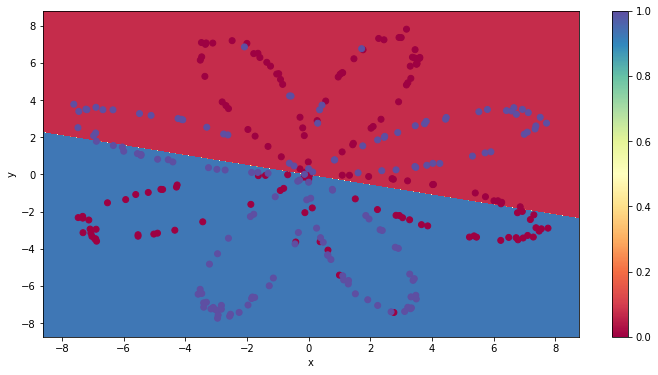

In [8]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y[:, 0])

In [9]:
def load_data_set_2():
    np.random.seed(1)    
    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    Y = np.zeros((N*K,1), dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    
    return X, Y

X,Y = load_data_set_2()

print("X[:2, :]: %s"%(X[:2, :]))
print("Y[:2, :]: %s"%(Y[:2, :]))
print("X.shape: %s"%(str(X.shape)))
print("Y.shape: %s"%(str(Y.shape)))

X[:2, :]: [[ 0.          0.        ]
 [-0.00082682  0.01006711]]
Y[:2, :]: [[0]
 [0]]
X.shape: (300, 2)
Y.shape: (300, 1)


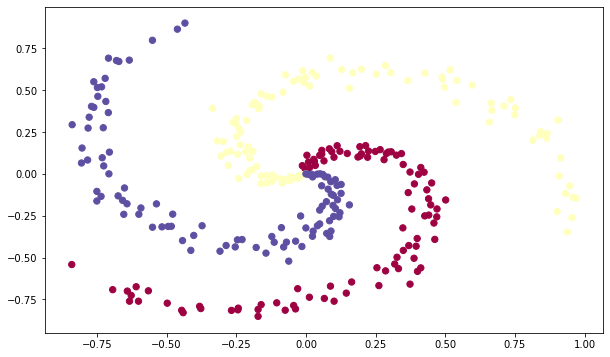

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=40, cmap=plt.cm.Spectral);

In [11]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, Y.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [12]:
X_ = X[0]
print(X.shape)
y_test = X[:1]
print(y_test.shape)
print(clf.predict(np.array([[-8,-8]])))
print(clf.predict(np.array([[8,8]])))

(300, 2)
(1, 2)
[2]
[1]


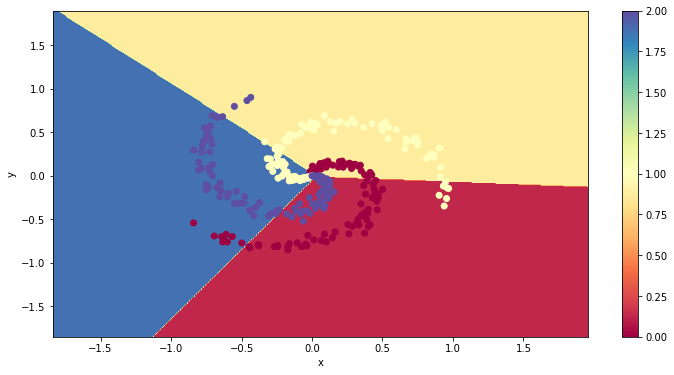

In [13]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y[:, 0])

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))    

In [15]:
def initialize_input_hidden_output_dimens(X, dim_hid, Y):
    return X.shape[1], dim_hid, Y.shape[1]

X_test_dim = np.array([[1,1,1],[2,2,2]])
Y_test_dim = np.array([[1],[1]])
print("shape X_test: %s"%(str(X_test_dim.shape)))
print("shape Y_test: %s"%(str(Y_test_dim.shape)))
print("input, hidden, output: %s"%(str(initialize_input_hidden_output_dimens(X_test_dim, 4, Y_test_dim))))

shape X_test: (2, 3)
shape Y_test: (2, 1)
input, hidden, output: (3, 4, 1)


In [16]:
def initialize_random_parameters(dim_x, dim_h, dim_y):
    np.random.seed(2)
    W1 = np.random.randn(dim_h, dim_x) * 0.01
    b1 = np.zeros(shape=(dim_h,1))
    W2 = np.random.randn(dim_y, dim_h) * 0.01
    b2 = np.zeros(shape=(dim_y,1))
    
    return { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

parameter_test = initialize_random_parameters(3,5,1)
print('test W1.shape: %s'%(str(parameter_test['W1'].shape)))
print('test b1.shape: %s'%(str(parameter_test['b1'].shape)))
print('test W2.shape: %s'%(str(parameter_test['W2'].shape)))
print('test b2.shape: %s'%(str(parameter_test['b2'].shape)))

test W1.shape: (5, 3)
test b1.shape: (5, 1)
test W2.shape: (1, 5)
test b2.shape: (1, 1)


In [17]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X.T) + b1
    Y1_hat = np.tanh(Z1)
    Z2 = np.dot(W2, Y1_hat) + b2
    Y2_hat = sigmoid(Z2)
    
    return Y2_hat, {'Z1': Z1, 'Y1_hat':Y1_hat, 'Z2': Z2, 'Y2_hat': Y2_hat}

par_test = initialize_random_parameters(3,5,1)
X_par_test = np.zeros(shape=(4,3))
Y2_hat_test, cache_test = forward_propagation(X_par_test, 
                                        par_test['W1'],
                                        par_test['b1'],
                                        par_test['W2'],
                                        par_test['b2'])
print("test X.shape: %s"%(str(X_par_test.shape)))
print("Y2_hat_test: %s"%(str(Y2_hat_test.shape)))

test X.shape: (4, 3)
Y2_hat_test: (1, 4)


In [18]:
def get_cost(Y, Y2_hat):
    m = Y.shape[0]
    logprobs = Y.T * np.log(Y2_hat) + (1-Y.T)*np.log(1-Y2_hat)
    cost = -1/m * np.sum(logprobs)
    cost = np.squeeze(cost)
    
    return cost

Y_cost_test = np.ones(shape=(4,1))
print(get_cost(Y_cost_test, Y2_hat_test))

0.6931471805599453


In [19]:
def backward_propagation(parameters, cache, X,Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    Y1_hat = cache['Y1_hat']
    Y2_hat = cache['Y2_hat']
    
    dZ2= Y2_hat - Y.T
    dW2 = (1 / m) * np.dot(dZ2, Y1_hat.T)    
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(Y1_hat, 2))
    dW1 = (1 / m) * np.dot(dZ1, X)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads_test = backward_propagation(par_test, cache_test, X_par_test, Y_cost_test)
print('test dW1.shape: %s'%(str(grads_test['dW1'].shape)))
print('test db1.shape: %s'%(str(grads_test['db1'].shape)))
print('test dW2.shape: %s'%(str(grads_test['dW2'].shape)))
print('test db2.shape: %s'%(str(grads_test['db2'].shape)))

test dW1.shape: (5, 3)
test db1.shape: (5, 1)
test dW2.shape: (1, 5)
test db2.shape: (1, 1)


In [20]:
def update_parameters(param, grads, lr):
    param['W1'] = param['W1'] - lr * grads['dW1']
    param['b1'] = param['b1'] - lr * grads['db1']
    param['W2'] = param['W2'] - lr * grads['dW2']
    param['b2'] = param['b2'] - lr * grads['db2']
    
    return param 
    

In [21]:
def predict(parameters, X):
    Y2_hat, cache = forward_propagation(X,
                                        parameters['W1'],
                                        parameters['b1'],
                                        parameters['W2'],
                                        parameters['b2'])
    predictions = np.round(Y2_hat)
    return predictions

In [22]:
def nn_model(X, Y, n_h, num_iter, lr):
    dim_x, dim_h, dim_y = initialize_input_hidden_output_dimens(X, n_h, Y)

    parameters = initialize_random_parameters(dim_x, dim_h, dim_y)
          
    for i in range(0, num_iter):
        # forward propagation
        Y2_hat, cache = forward_propagation(X,
                                           parameters['W1'],
                                           parameters['b1'],
                                           parameters['W2'],
                                           parameters['b2'])
        
                
        # Cost function
        cost = get_cost(Y, Y2_hat)
        
        # backward propagation
        grads = backward_propagation(parameters, cache, X, Y)
        
        # parameters gradient
        parameters = update_parameters(parameters, grads, lr)
        
        if i % 500 == 0:
            print("Cost iteration %i: %f"%(i, cost))
         
    return parameters

In [23]:
print("Test model")
X_model_test = np.array([[1,1],[0,1],[1,0],[0,0]]).T
Y_model_test = np.array([[0,1,1,0]])
print(X_model_test.shape)
print(Y_model_test.shape)
nn_model(X_model_test, Y_model_test, 4, 201, 0.05)

Test model
(2, 4)
(1, 4)
Cost iteration 0: 5.544903


{'W1': array([[-0.19408661, -0.0958989 , -0.11594476,  0.01640271],
        [-0.36319848, -0.18003395, -0.16861883, -0.01245288],
        [-0.12070388, -0.06397955, -0.04972035,  0.02292208],
        [-0.39078907, -0.20534877, -0.19164436, -0.0059616 ]]),
 'b1': array([[-0.18991903],
        [-0.34526413],
        [-0.11012436],
        [-0.39120446]]),
 'W2': array([[ 0.16167902,  0.32519349,  0.08639924,  0.35150961],
        [-0.17036296, -0.31447592, -0.09114493, -0.36071394],
        [-0.16485769, -0.31506099, -0.10002019, -0.36246481],
        [ 0.14747725,  0.31154972,  0.09108065,  0.37332586]]),
 'b2': array([[-1.40880625],
        [ 1.40756767],
        [ 1.40705553],
        [-1.40782257]])}

In [24]:
X, Y = load_dataset_1()
parameters = nn_model(X, Y, 4, 10001, 0.02)
predictions = predict(parameters, X)
accuracy = (np.dot(predictions, Y) + np.dot(1-predictions, 1-Y))/(float(Y.size))*100.0
print("Trainning Accuracy: %f"%(accuracy)+"%")

Cost iteration 0: 0.692948
Cost iteration 500: 0.204613
Cost iteration 1000: 0.199107
Cost iteration 1500: 0.196371
Cost iteration 2000: 0.194274
Cost iteration 2500: 0.192295
Cost iteration 3000: 0.191013
Cost iteration 3500: 0.189999
Cost iteration 4000: 0.189148
Cost iteration 4500: 0.188405
Cost iteration 5000: 0.187738
Cost iteration 5500: 0.187128
Cost iteration 6000: 0.186565
Cost iteration 6500: 0.186040
Cost iteration 7000: 0.185547
Cost iteration 7500: 0.185084
Cost iteration 8000: 0.184645
Cost iteration 8500: 0.184230
Cost iteration 9000: 0.183834
Cost iteration 9500: 0.183458
Cost iteration 10000: 0.183097
Trainning Accuracy: 94.333333%


(300, 2)
(300, 1)


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

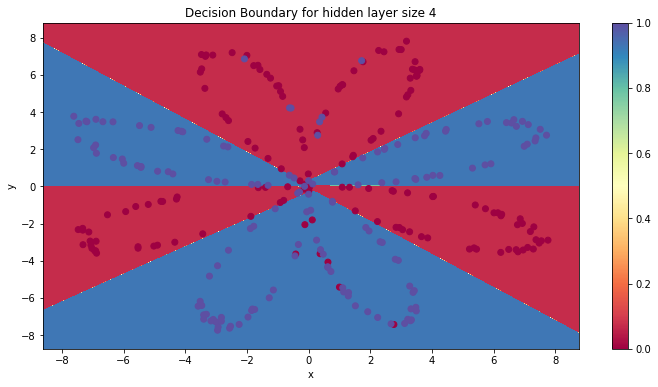

In [25]:
print(X.shape)
print(Y.shape)
plot_decision_boundary(lambda x: predict(parameters, x), X, Y[:, 0])
plt.title("Decision Boundary for hidden layer size 4")

In [26]:
def softmax(x):
    orig_shape = x.shape
    if len(x.shape) > 1:
        c = -1*np.amax(x,axis=1,keepdims=True ) 
        x_exp = np.exp(x+c)
        x_sum = np.sum(x_exp, axis=1, keepdims=True)
        x = x_exp/x_sum    
    else:
        c = -np.amax(x)        
        x_exp = np.exp(x+c)
        x_sum = np.sum(x_exp, axis=0, keepdims=True)
        x = x_exp/x_sum
    return x

print(softmax(np.array([[9,2,5,0,0],[7,5,0,0,0]])))
print(softmax(np.array([[0,1,0],[1,0,0],[1,0,0]])))
print(softmax(np.array([[9, 2, 5, 0, 0], [7, 5, 0, 0 ,0]])))
print(softmax(np.array([[9, 2, 5, 0, 0], [7, 5, 0, 0 ,0]]).T))

[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]
[[0.21194156 0.57611688 0.21194156]
 [0.57611688 0.21194156 0.21194156]
 [0.57611688 0.21194156 0.21194156]]
[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]
[[0.88079708 0.11920292]
 [0.04742587 0.95257413]
 [0.99330715 0.00669285]
 [0.5        0.5       ]
 [0.5        0.5       ]]


In [27]:
def conver_to_one_vector(x, k):
    m = x.size
    one_hot_labels = np.zeros(shape=(m,k))
    for i in range(m):
        one_hot_labels[i,x[i,0]] = 1
    return one_hot_labels
one_hot_labels = conver_to_one_vector(np.array([[1],[2],[0],[0],[1]]), 3)
print(one_hot_labels)
print(one_hot_labels.shape)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
(5, 3)


In [28]:
def forward_propagation_2(X,W1,b1,W2,b2):
    Z1 = np.dot(W1, X.T) + b1
    Y1_hat = np.tanh(Z1)
    Z2 = np.dot(W2, Y1_hat) + b2
    Y2_hat = softmax(Z2.T).T
    
    return Y2_hat, {'Z1': Z1, 'Y1_hat':Y1_hat, 'Z2': Z2, 'Y2_hat': Y2_hat}

par_test = initialize_random_parameters(3,5,3)
X_par_test = np.zeros(shape=(4,3))
Y2_hat_test, cache_test = forward_propagation_2(X_par_test, 
                                        par_test['W1'],
                                        par_test['b1'],
                                        par_test['W2'],
                                        par_test['b2'])
print("test X.shape: %s"%(str(X_par_test.shape)))
print("Y2_hat_test: %s"%(str(Y2_hat_test.shape)))    

test X.shape: (4, 3)
Y2_hat_test: (3, 4)


In [29]:
def get_cost_2(Y, Y2_hat):
    # softmax function
    
    m = Y.shape[0]
    cost = 1/m * np.sum(-Y * np.log(Y2_hat.T))
    cost = np.squeeze(cost)
    
    return cost

Y_cost_test = np.ones(shape=(4,3))
print(get_cost_2(Y_cost_test, Y2_hat_test))

3.2958368660043287


In [30]:
def backward_propagation_2(parameters, cache, X,Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    Y1_hat = cache['Y1_hat']
    Y2_hat = cache['Y2_hat']
    
    dZ2= Y2_hat - Y.T
    dW2 = (1 / m) * np.dot(dZ2, Y1_hat.T)    
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(Y1_hat, 2))
    dW1 = (1 / m) * np.dot(dZ1, X)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads_test = backward_propagation_2(par_test, cache_test, X_par_test, Y_cost_test)
print('test dW1.shape: %s'%(str(grads_test['dW1'].shape)))
print('test db1.shape: %s'%(str(grads_test['db1'].shape)))
print('test dW2.shape: %s'%(str(grads_test['dW2'].shape)))
print('test db2.shape: %s'%(str(grads_test['db2'].shape)))

test dW1.shape: (5, 3)
test db1.shape: (5, 1)
test dW2.shape: (3, 5)
test db2.shape: (3, 1)


In [31]:
def predict_2(parameters, X):
    Y2_hat,_ = forward_propagation_2(X,
                                        parameters['W1'],
                                        parameters['b1'],
                                        parameters['W2'],
                                        parameters['b2'])
    predictions = np.argmax(Y2_hat.T, axis = 1)
    predictions = predictions.reshape(predictions.size, 1)
    return predictions

In [32]:
def nn_model_2(X, Y, k, n_h, num_iter, lr):
    Y_one_hot = conver_to_one_vector(Y, k)
    print('Y_one_hot.shape' + str(Y_one_hot.shape))
    
    dim_x, dim_h, dim_y = initialize_input_hidden_output_dimens(X, n_h, Y_one_hot)
    print("%d %d %d"%(dim_x, dim_h, dim_y))

    parameters = initialize_random_parameters(dim_x, dim_h, dim_y)
    print("%s %s %s %s"%(str(parameters['W1'].shape),
                      str(parameters['b1'].shape),
                      str(parameters['W2'].shape),
                      str(parameters['b2'].shape)))
    
    for i in range(0, num_iter):
        # forward propagation
        Y2_hat, cache = forward_propagation_2(X,
                                           parameters['W1'],
                                           parameters['b1'],
                                           parameters['W2'],
                                           parameters['b2'])
        
                
        # Cost function
        cost = get_cost_2(Y_one_hot, Y2_hat)
        
        # backward propagation
        grads = backward_propagation_2(parameters, cache, X, Y_one_hot)
        
        # parameters gradient
        parameters = update_parameters(parameters, grads, lr)
        
        if i % 500 == 0:
            print("Cost iteration %i: %f"%(i, cost))
         
    return parameters

In [33]:
X, Y = load_data_set_2()
parameters = nn_model_2(X, Y, 3, 4, 10091, 0.02)
predictions = predict_2(parameters, X)
accuracy = (predictions == Y).mean()
print("Trainning Accuracy: %f"%(accuracy*100)+"%")

Y_one_hot.shape(300, 3)
2 4 3
(4, 2) (4, 1) (3, 4) (3, 1)
Cost iteration 0: 1.098561
Cost iteration 500: 0.259230
Cost iteration 1000: 0.183942
Cost iteration 1500: 0.160529
Cost iteration 2000: 0.148963
Cost iteration 2500: 0.141636
Cost iteration 3000: 0.136465
Cost iteration 3500: 0.132561
Cost iteration 4000: 0.129444
Cost iteration 4500: 0.126838
Cost iteration 5000: 0.124588
Cost iteration 5500: 0.122612
Cost iteration 6000: 0.120867
Cost iteration 6500: 0.119321
Cost iteration 7000: 0.117927
Cost iteration 7500: 0.116634
Cost iteration 8000: 0.115456
Cost iteration 8500: 0.114521
Cost iteration 9000: 0.111875
Cost iteration 9500: 0.111519
Cost iteration 10000: 0.134365
Trainning Accuracy: 94.333333%


(300, 2)
(300, 1)


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

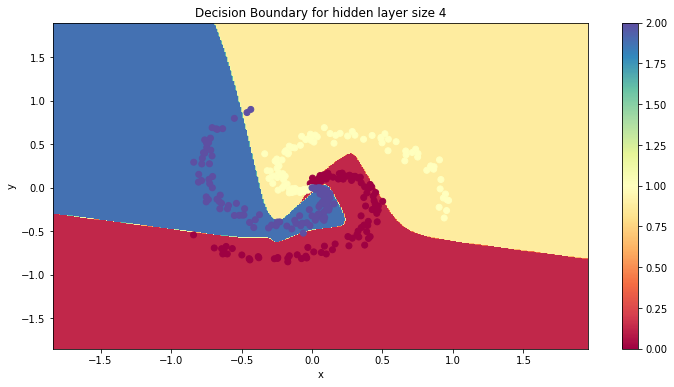

In [34]:
print(X.shape)
print(Y.shape)
plot_decision_boundary(lambda x: predict_2(parameters, x), X, Y[:, 0])
plt.title("Decision Boundary for hidden layer size 4")